In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib


In [ ]:

#cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

imageFilename ="face.jpg"
img= cv2.imread(imageFilename)
#cv2.imshow('img',img)
faces = detector(img,2)
#print(faces)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)

    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        
cv2.imshow('img',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()


In [ ]:
imageFilename ="face.jpg"
img= cv2.imread(imageFilename)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) <1000:
        continue

    # Creates a rectangular box around the object in the frame
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
cv2.imshow('img',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [ ]:
imageFilename ="face.jpg"
rawImage= cv2.imread(imageFilename)


faces = detector(img,2)
#print(faces)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)

    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        
bilateral_filtered_image = cv2.bilateralFilter(rawImage, 5, 175, 175)
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
#imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 10) ):
        contour_list.append(contour)
cv2.drawContours(rawImage, contour_list,  -1, (255,0,0), 2)
cv2.imshow('Objects Detected',rawImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:

#cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

imageFilename ="face.jpg"
img= cv2.imread(imageFilename)
#cv2.imshow('img',img)
faces = detector(img,2)
#print(faces)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)
    l=[]
    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        l.append((x,y))
    leye=l[0:6]
    reye=l[6:12]
    leye=np.array(leye)
    reye=np.array(reye)
#         #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
#     arl=eye_aspect_ratio(leye)

#     arr=eye_aspect_ratio(reye)
    leftEyeHull = cv2.convexHull(leye)
    rightEyeHull = cv2.convexHull(reye)
    
    
    
    
#     src_maskl = np.zeros(img.shape, img.dtype)
#     polyl = leftEyeHull
#     src_maskl = cv2.fillPoly(src_maskl, [polyl], (255, 255, 255))
#     src_maskr = np.zeros(img.shape, img.dtype)
#     polyr = rightEyeHull
#     src_maskr = cv2.fillPoly(src_maskr, [polyr], (255, 255, 255))
#     eyeRoiFinall = cv2.bitwise_and(src_maskl, img)
#     eyeRoiFinalr = cv2.bitwise_and(src_maskr, img)
    
    
#     bilateral_filtered_image1 = cv2.bilateralFilter(eyeRoiFinall, 5, 175, 175)
#     edge_detected_image1 = cv2.Canny(bilateral_filtered_image1, 75, 200)
#     ret,thresh1 = cv2.threshold(edge_detected_image1,127,255,0)
#     contours1, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     contour_list1 = []
#     for contour in contours1:
#         approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
#         area = cv2.contourArea(contour)
#         contour_list1.append(contour)
#     M1 = cv2.moments(contour_list1[1])
#     cX1 = int(M["m10"] / M["m00"])
#     cY1 = int(M["m01"] / M["m00"])    
    
    
    
    
    
    
    bilateral_filtered_image = cv2.bilateralFilter(eyeRoiFinalr, 5, 175, 175)
    #cv2.imshow('Bilateral', bilateral_filtered_image)
    edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
    ret,thresh2 = cv2.threshold(edge_detected_image,127,255,0)
    contours2, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contour_list2 = []
    for contour in contours2:
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area = cv2.contourArea(contour)
        contour_list2.append(contour)
    M2 = cv2.moments(contour_list2[1])
    cX2 = int(M["m10"] / M["m00"])
    cY2 = int(M["m01"] / M["m00"])      


cv2.drawContours(img, contour_list1[1],  -1, (255,0,0), 2)
cv2.drawContours(img, contour_list2[1],  -1, (255,0,0), 2)
cv2.imshow('img',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()



NameError: name 'thresh' is not defined

In [36]:
imageFilename ="face.jpg"
img= cv2.imread(imageFilename)
src_mask = np.zeros(img.shape, img.dtype)
poly = rightEyeHull
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

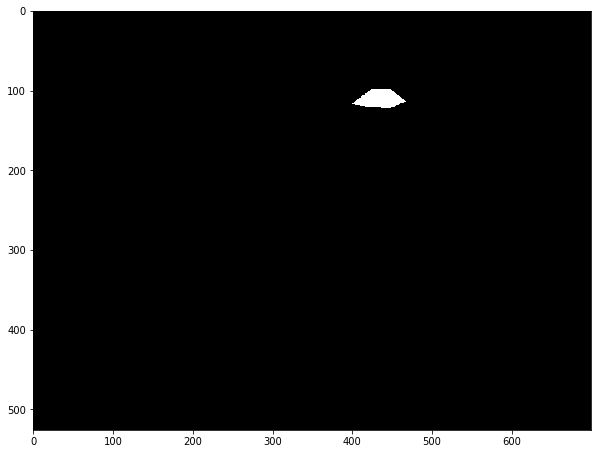

In [37]:
plt.imshow(src_mask[:,:,::-1])
plt.show()

In [38]:
eyeRoiFinal = cv2.bitwise_and(src_mask, img)


In [39]:
rawImage=eyeRoiFinal

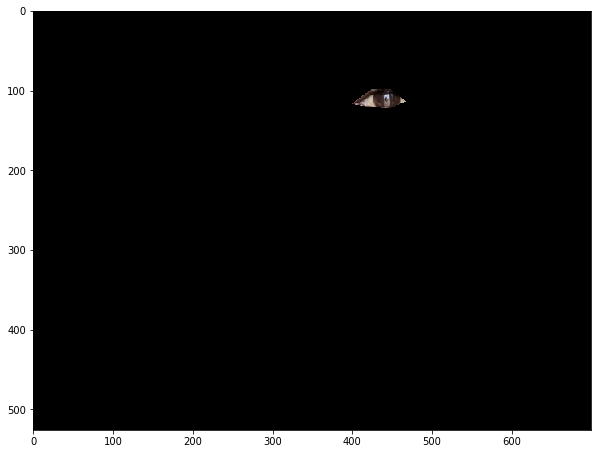

In [40]:
plt.imshow(eyeRoiFinal[:,:,::-1])
plt.show()

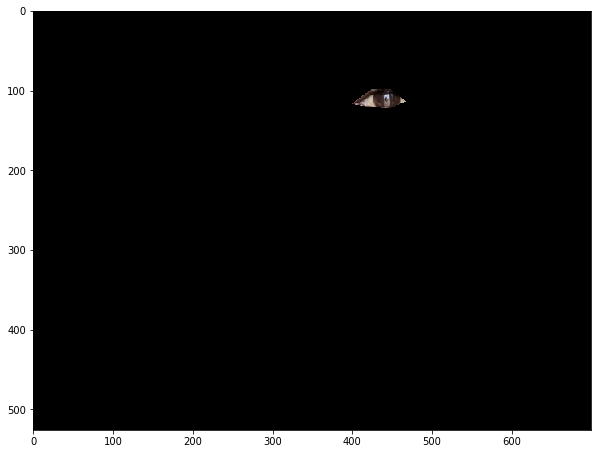

In [41]:
plt.imshow(rawImage[:,:,::-1])
plt.show()

In [81]:
rawImage = cv2.imread('eyes.jpg')

In [82]:
bilateral_filtered_image = cv2.bilateralFilter(rawImage, 5, 175, 175)
#cv2.imshow('Bilateral', bilateral_filtered_image)
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
ret,thresh = cv2.threshold(edge_detected_image,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [83]:
#img = cv2.drawContours(eyeRoiFinal, contours, -1, (0,255,0), 3)

In [86]:
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    
    contour_list.append(contour)

In [87]:
len(contour_list)

18

In [88]:
contour_list[1]

array([[[ 5, 17]],

       [[ 4, 18]],

       [[ 2, 18]],

       [[ 1, 19]],

       [[ 0, 19]],

       [[ 2, 19]],

       [[ 3, 18]],

       [[ 4, 18]],

       [[ 5, 17]],

       [[10, 17]]], dtype=int32)

In [89]:

# compute the center of the contour
M = cv2.moments(contour_list[1])
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

In [90]:
cX

2

In [91]:
cY

18

In [ ]:
for i in range(len(contour_list)):
    raw=rawImage
    cv2.drawContours(raw, contour_list[i],  -1, (255,0,0), 2)
    cv2.imshow('img',raw)
    cv2.waitKey(0) # waits until a key is pressed
    cv2.destroyAllWindows()

In [ ]:
plt.imshow(rawImage[:,:,::-1])
plt.show()

In [32]:
raw=rawImage
cv2.drawContours(raw, contour_list[i],  -1, (255,0,0), 2)
cv2.imshow('img',rawImage)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

In [53]:
cv2.drawContours(rawImage, contour_list[1],  -1, (255,0,0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

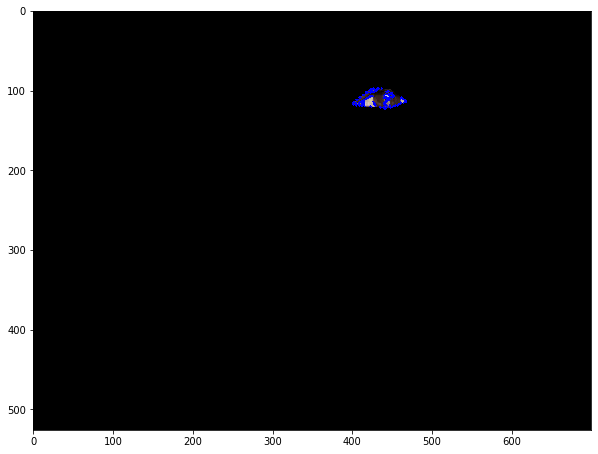

In [54]:
plt.imshow(rawImage[:,:,::-1])
plt.show()

In [57]:

import numpy as np
import cv2
import time

cap = cv2.VideoCapture(0) 	#640,480
w = 640
h = 480

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        
	
		#downsample
		#frameD = cv2.pyrDown(cv2.pyrDown(frame))
        #frameDBW = cv2.cvtColor(frameD,cv2.COLOR_RGB2GRAY)
        img=frame
        #detect face
        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
        faces = cv2.CascadeClassifier('haarcascade_eye.xml')
        detected = faces.detectMultiScale(frame, 1.3, 5)

        #faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        #detected2 = faces.detectMultiScale(frameDBW, 1.3, 5)

        pupilFrame = frame
        pupilO = frame
        windowClose = np.ones((5,5),np.uint8)
        windowOpen = np.ones((2,2),np.uint8)
        windowErode = np.ones((2,2),np.uint8)

        #draw square
        for (x,y,w,h) in detected:
            cv2.rectangle(frame, (x,y), ((x+w),(y+h)), (0,0,255),1)	
            cv2.line(frame, (x,y), ((x+w,y+h)), (0,0,255),1)
            cv2.line(frame, (x+w,y), ((x,y+h)), (0,0,255),1)
            pupilFrame = cv2.equalizeHist(frame[y+(int(h*.25)):(y+h), x:(x+w)])
            pupilO = pupilFrame
            ret, pupilFrame = cv2.threshold(pupilFrame,55,255,cv2.THRESH_BINARY)		#50 ..nothin 70 is better
            pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_CLOSE, windowClose)
            pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_ERODE, windowErode)
            pupilFrame = cv2.morphologyEx(pupilFrame, cv2.MORPH_OPEN, windowOpen)

            #so above we do image processing to get the pupil..
            #now we find the biggest blob and get the centriod

            threshold = cv2.inRange(pupilFrame,250,255)		#get the blobs
            contours, hierarchy = cv2.findContours(threshold,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

            #if there are 3 or more blobs, delete the biggest and delete the left most for the right eye
            #if there are 2 blob, take the second largest
            #if there are 1 or less blobs, do nothing
			
            if len(contours) >= 2:
                #find biggest blob
                maxArea = 0
                MAindex = 0			#to get the unwanted frame 
                distanceX = []		#delete the left most (for right eye)
                currentIndex = 0 
                for cnt in contours:
                    area = cv2.contourArea(cnt)
                    center = cv2.moments(cnt)
                    cx,cy = int(center['m10']/(center['m00']+0.00001)), int(center['m01']/(center['m00']+0.00001))
                    distanceX.append(cx)	
                    if area > maxArea:
                        maxArea = area
                        MAindex = currentIndex
                    currentIndex = currentIndex + 1

                del contours[MAindex]		#remove the picture frame contour
                del distanceX[MAindex]

            eye = 'right'

            if len(contours) >= 2:		#delete the left most blob for right eye
                if eye == 'right':
                    edgeOfEye = distanceX.index(min(distanceX))
                else:
                    edgeOfEye = distanceX.index(max(distanceX))	
                del contours[edgeOfEye]
                del distanceX[edgeOfEye]

            if len(contours) >= 1:		#get largest blob
                maxArea = 0
                for cnt in contours:
                    area = cv2.contourArea(cnt)
                    if area > maxArea:
                        maxArea = area
                        largeBlob = cnt

            if len(largeBlob) > 0:	
                center = cv2.moments(largeBlob)
                cx,cy = int(center['m10']/center['m00']), int(center['m01']/center['m00'])
                cv2.circle(frame,(cx,cy),5,255,-1)


        #show picture
        cv2.imshow('frame',frame)
        #cv2.imshow('frame2',pupilFrame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

	#else:
		#break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()


In [58]:
src = cv2.imread('eyes.jpg')